# Garment Case Study

Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. Consider that you are working as a data scientist in a Garment Manufacturing company and your goal is to analyse and predict the productivity performance of the working teams in their factories

The task is very simple: use Decision Tree to make a predictive model on their productivity using time related variables, department, overtime, incentives, idle time, etc.

Can you help the management in identifying the key factors that affect the productivity of employees?

**date**			:	Date in MM-DD-YYYY

**day**			:	Day of the Week

**quarter**			:	A portion of the month. A month was divided into four quarters

**department**		:	Associated department with the instance

**team_no**			:	Associated team number with the instance

**no_of_workers**		:	Number of workers in each team

**no_of_style_change**	:	Number of changes in the style of a particular product

**targeted_productivity**	:	Targeted productivity set by the Authority for each team for each day.

**smv**			:	Standard Minute Value, it is the allocated time for a task

**wip**			:	Work in progress. Includes the number of unfinished items for products

**over_time**		:	Represents the amount of overtime by each team in minutes

**incentive**		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

**idle_time**		:	The amount of time when the production was interrupted due to several reasons

**idle_men**		:	The number of workers who were idle due to production interruption

**actual_productivity**	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [ ]:
session starts at 04.20 pm

In [ ]:
decile

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
#Import the dataset
df = pd.read_csv("/content/garments_worker_productivity - garments_worker_productivity.csv.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Data Health Checks

 1. Info and describe
 2. Missing values checks
 3. Data types checks
 3. duplicates checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


## Observations:

## Fixing the issues

In [ ]:
df.isnull().sum()/df.shape[1]

date                      0.000000
quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      33.733333
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["wip"].fillna(df["wip"].median(),inplace = True)

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df["quarter" ] = df.quarter.astype("category")
df["department" ] = df["department"].astype("category")
df["day"] = df["day"].astype("category")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Univariate analysis

In [ ]:
def univariate_numerical_analysis(df, column, figsize=(8,6), bins = 10):
    # Measures of central tendency
    print("Measures of central tendency for", column)
    print("Mean:", df[column].mean())
    print("Median:", df[column].median())
    print("Mode:", df[column].mode().values[0])
    print()

    # Measures of dispersion
    print("Measures of dispersion for", column)
    print("Standard Deviation:", df[column].std())
    print("Range:", df[column].max() - df[column].min())
    print()

    # Plot the histogram
    _, ax_hist = plt.subplots(
        nrows=1,  # Number of rows of the subplot grid=1
        figsize=figsize,
    )  # creating the 2 subplots
    sns.histplot(data=df, x=column, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(
        df[column].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        df[column].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show()

In [ ]:
def univariate_categorical_analysis(df, column):

    print("Percentage distribution for", column)
    print(df[column].value_counts(normalize=True) * 100)
    print()

    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Bar Plot: " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
num_col = df.select_dtypes(["int64","float64"]).columns.tolist()
num_col

['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

In [ ]:
cat_col = df.select_dtypes(["object","category"]).columns.tolist()
cat_col

['quarter', 'department', 'day']

Measures of central tendency for team
Mean: 6.426900584795321
Median: 6.0
Mode: 2

Measures of dispersion for team
Standard Deviation: 3.463963284992193
Range: 11



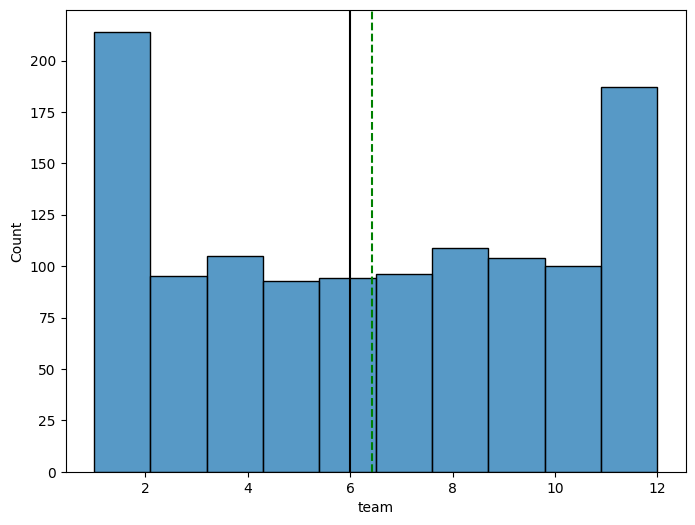

Measures of central tendency for targeted_productivity
Mean: 0.7296324143692565
Median: 0.75
Mode: 0.8

Measures of dispersion for targeted_productivity
Standard Deviation: 0.09789096325790547
Range: 0.73



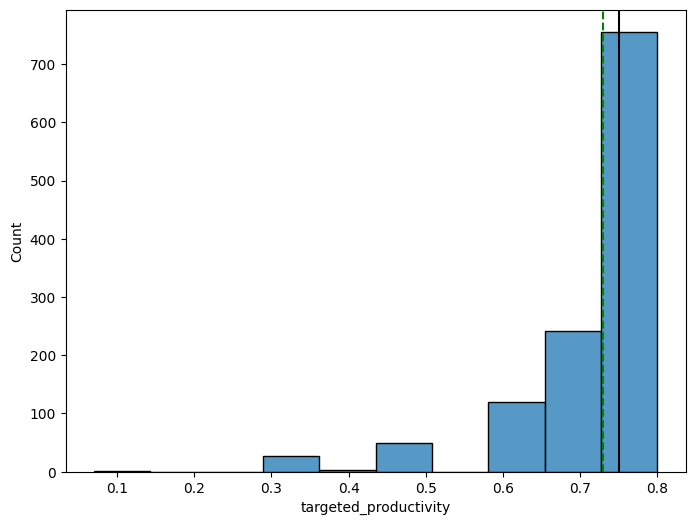

Measures of central tendency for smv
Mean: 15.062172096908938
Median: 15.26
Mode: 3.94

Measures of dispersion for smv
Standard Deviation: 10.943219199514315
Range: 51.660000000000004



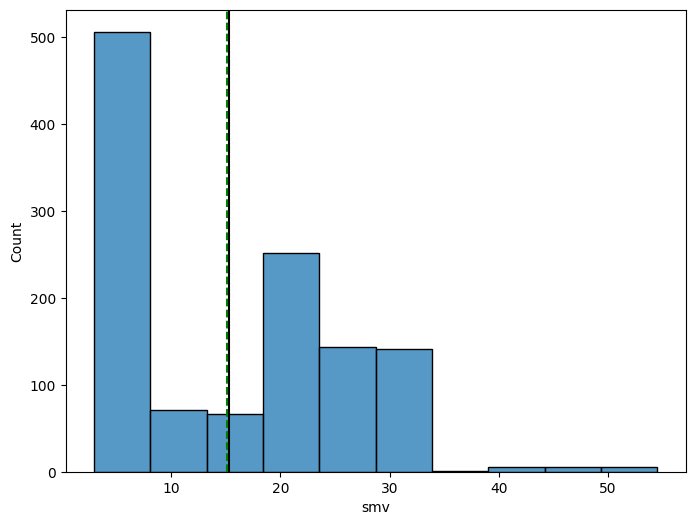

Measures of central tendency for wip
Mean: 1126.43776106934
Median: 1039.0
Mode: 1039.0

Measures of dispersion for wip
Standard Deviation: 1397.65319148082
Range: 23115.0



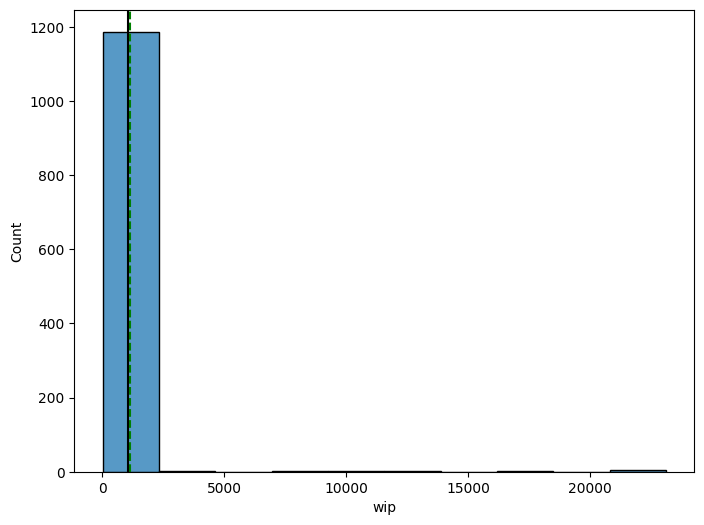

Measures of central tendency for over_time
Mean: 4567.460317460317
Median: 3960.0
Mode: 960

Measures of dispersion for over_time
Standard Deviation: 3348.8235628832363
Range: 25920



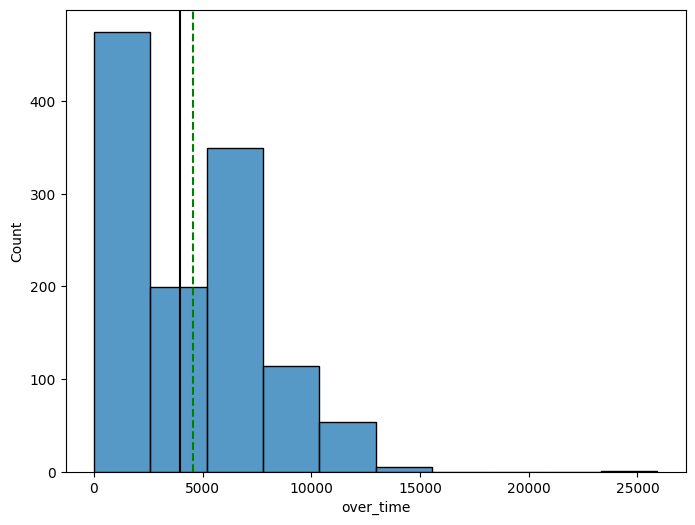

Measures of central tendency for incentive
Mean: 38.21052631578947
Median: 0.0
Mode: 0

Measures of dispersion for incentive
Standard Deviation: 160.18264279560262
Range: 3600



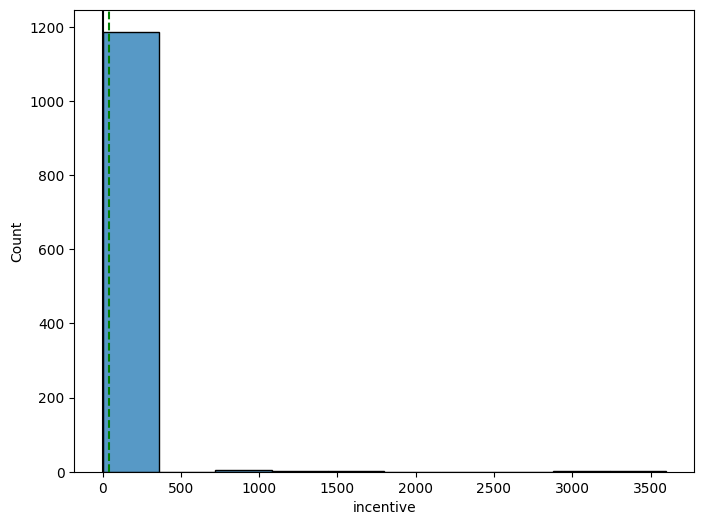

Measures of central tendency for idle_time
Mean: 0.7301587301587301
Median: 0.0
Mode: 0.0

Measures of dispersion for idle_time
Standard Deviation: 12.709756518546563
Range: 300.0



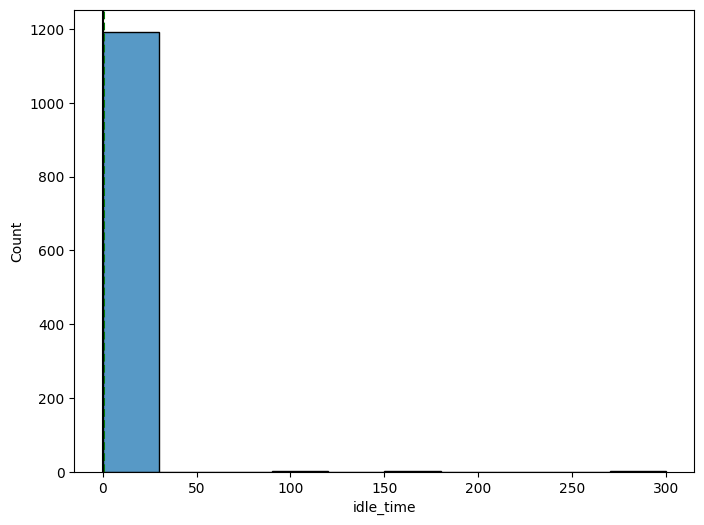

Measures of central tendency for idle_men
Mean: 0.3692564745196324
Median: 0.0
Mode: 0

Measures of dispersion for idle_men
Standard Deviation: 3.268987324178146
Range: 45



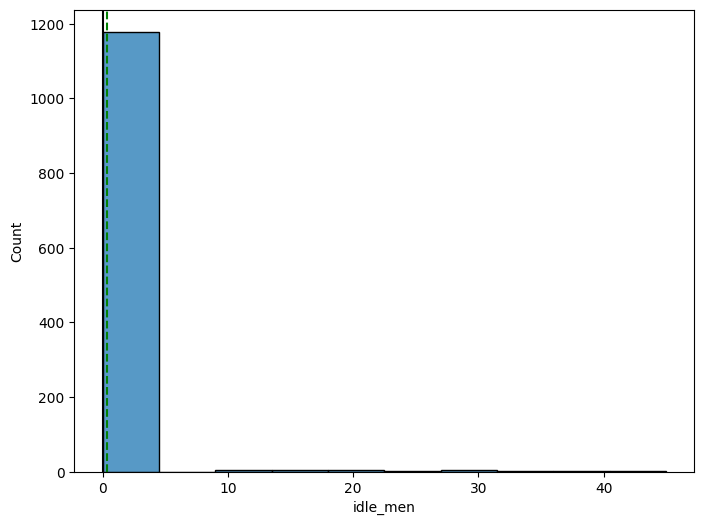

Measures of central tendency for no_of_style_change
Mean: 0.15037593984962405
Median: 0.0
Mode: 0

Measures of dispersion for no_of_style_change
Standard Deviation: 0.42784785650619567
Range: 2



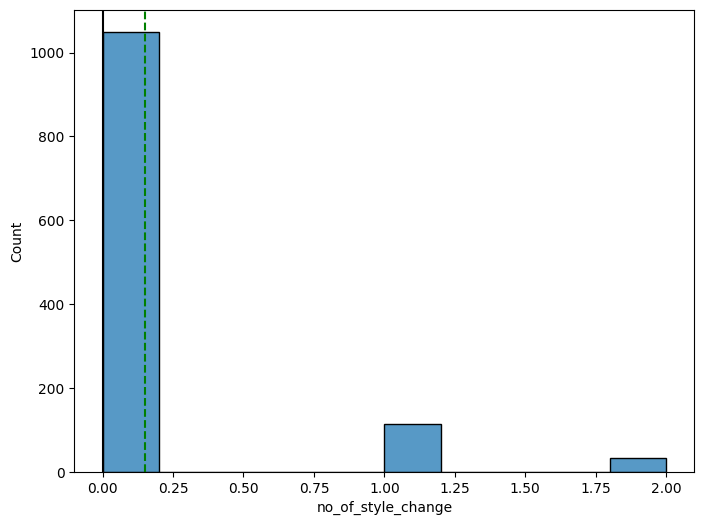

Measures of central tendency for no_of_workers
Mean: 34.60985797827903
Median: 34.0
Mode: 8.0

Measures of dispersion for no_of_workers
Standard Deviation: 22.19768668225043
Range: 87.0



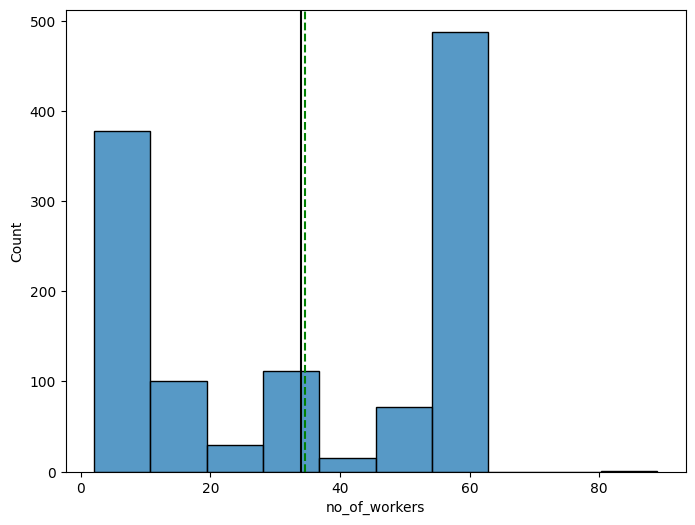

Measures of central tendency for actual_productivity
Mean: 0.7350910969791145
Median: 0.773333333
Mode: 0.800401961

Measures of dispersion for actual_productivity
Standard Deviation: 0.1744879035093953
Range: 0.886732024



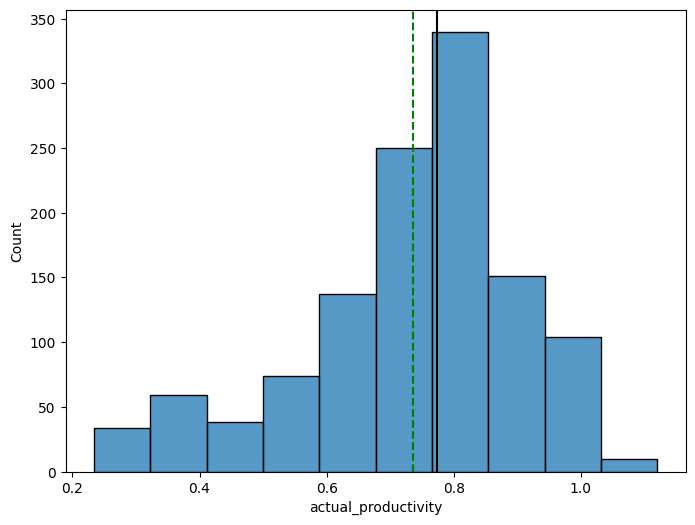

In [ ]:
for i in num_col :
  univariate_numerical_analysis(df,i)



## Observations:

## Univariate analysis

Percentage distribution for quarter
quarter
Quarter1    30.075188
Quarter2    27.986633
Quarter4    20.718463
Quarter3    17.543860
Quarter5     3.675856
Name: proportion, dtype: float64



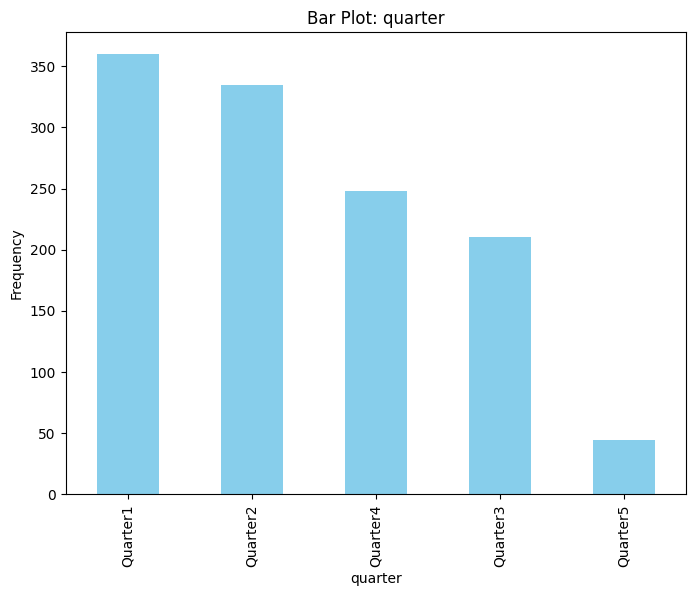

Percentage distribution for department
department
sweing       57.727652
finishing    42.272348
Name: proportion, dtype: float64



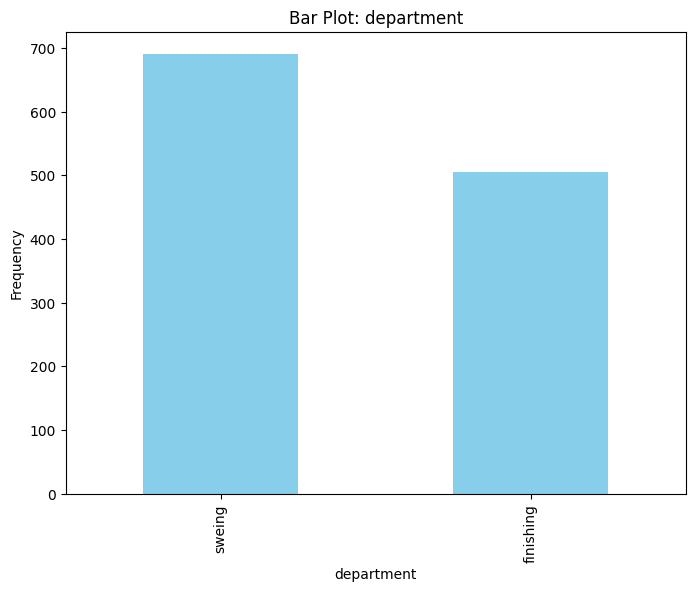

Percentage distribution for day
day
Wednesday    17.376775
Sunday       16.959064
Tuesday      16.791980
Monday       16.624896
Thursday     16.624896
Saturday     15.622389
Name: proportion, dtype: float64



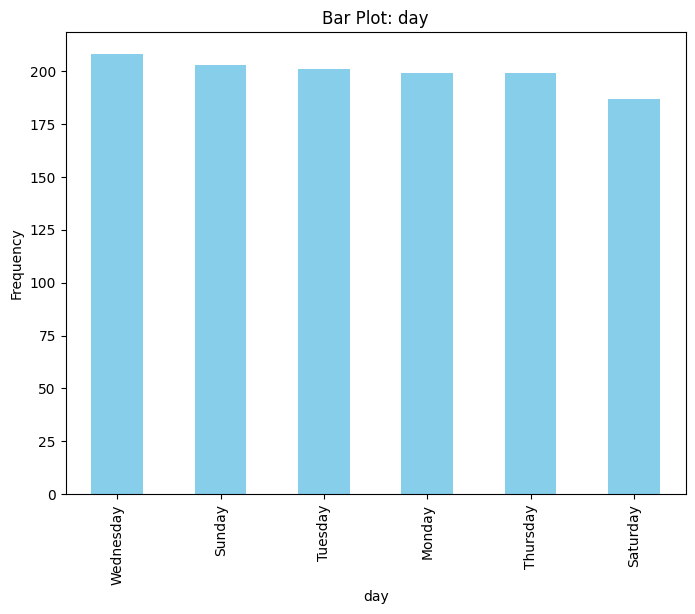

In [ ]:
for i in cat_col :
  univariate_categorical_analysis(df,i)


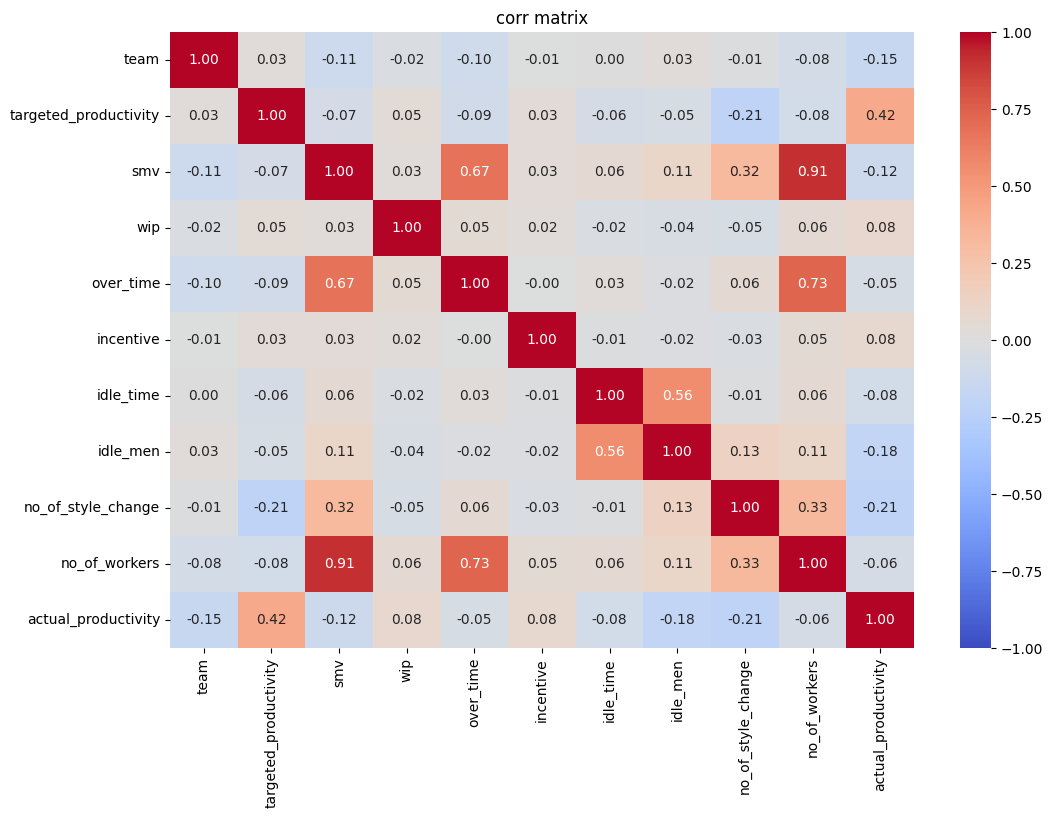

In [ ]:
corr_mat = df[num_col].corr()


plt.figure(figsize= (12,8))
sns.heatmap(corr_mat,annot = True, vmin = -1, vmax =1 , cmap = "coolwarm",center = 0,fmt = ".2f")
plt.title("corr matrix")
plt.show()

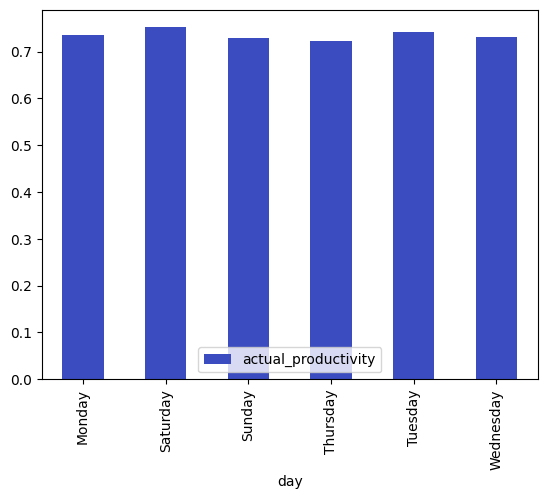

In [ ]:
df.pivot_table(index="day",values = "actual_productivity",aggfunc = "mean").plot(kind ="bar",colormap = "coolwarm")
plt.show()

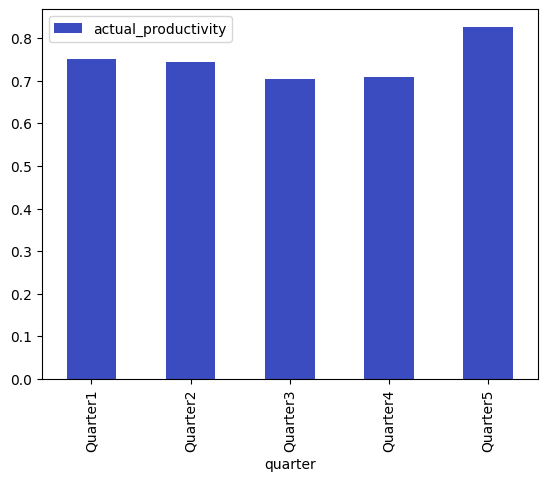

In [ ]:
df.pivot_table(index="quarter",values = "actual_productivity",aggfunc = "mean").plot(kind ="bar",colormap = "coolwarm")
plt.show()

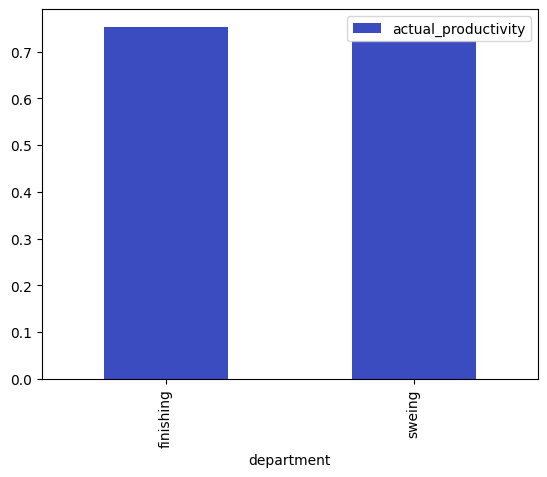

In [ ]:
df.pivot_table(index="department",values = "actual_productivity",aggfunc = "mean").plot(kind ="bar",colormap = "coolwarm")
plt.show()

## Observations

## Feature Engineering/Reduction

In [ ]:
df.drop(columns="date",inplace=True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Data Preprocessing

In [ ]:
df["over_time" ] = df["over_time"].apply(lambda x : x/60)
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,118.0,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,16.0,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,61.0,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,61.0,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,32.0,50,0.0,0,0,56.0,0.800382


In [ ]:
df = pd.get_dummies(df,columns = cat_col,drop_first=True,dtype = int)
df.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,1108.0,118.0,98,0.0,0,0,59.0,...,0,0,0,0,1,0,0,1,0,0
1,1,0.75,3.94,1039.0,16.0,0,0.0,0,0,8.0,...,0,0,0,0,0,0,0,1,0,0
2,11,0.80,11.41,968.0,61.0,50,0.0,0,0,30.5,...,0,0,0,0,1,0,0,1,0,0
3,12,0.80,11.41,968.0,61.0,50,0.0,0,0,30.5,...,0,0,0,0,1,0,0,1,0,0
4,6,0.80,25.90,1170.0,32.0,50,0.0,0,0,56.0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
df.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_sweing',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')

### Train Test Split

In [ ]:
x = df.drop(["actual_productivity"],axis =1)
y= df["actual_productivity"]

X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)

In [ ]:
print("Training set Shape: ", X_train.shape)
print("Test set Shape: ", X_test.shape)

print("Training set distribution:")
print(f'Avg: {y_train.mean()}, SD: {y_train.std()}')

print("Test set distribution:")
print(f'Avg: {y_test.mean()}, SD: {y_test.std()}')

Training set Shape:  (837, 20)
Test set Shape:  (360, 20)
Training set distribution:
Avg: 0.7342287210525688, SD: 0.17516799408069267
Test set distribution:
Avg: 0.7370961210083332, SD: 0.17312225119836125


## Model fitting and evaluation

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
# r2 score
model.score(X_train,y_train)

1.0

In [ ]:
model.score(X_test,y_test)

-0.015862281406659573

In [ ]:
# function to compute adjusted R-squared -- extra step

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def calc_metric_score(X, y_train, y_pred):
    # Error Metrics - low
    print("mean absolute error:",mean_absolute_error(y_train,y_pred))
    print("root mean squared error:",np.sqrt(mean_squared_error(y_train,y_pred)))

    # Accuracy metrics - high
    print("r2-score:",r2_score(y_train,y_pred))
    print("adj-r2 score:", adj_r2_score(X, y_train, y_pred))

## Hyper parameter tuning with grid search

#### Additional exercise: Explore more parameters to work with

In [ ]:
# Choose the type of regressor.
clf = DecisionTreeRegressor()

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(3, 10, 1),
    "max_leaf_nodes": [50, 75, 150, 250, 300],
    "min_samples_split": [10, 20, 30, 50, 70, 100]
}

# Run the grid search
_grid_obj = GridSearchCV(clf, parameters, cv=5, verbose = 1)
_grid_obj = _grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
grid_clf = _grid_obj.best_estimator_

print(grid_clf)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
DecisionTreeRegressor(max_depth=8, max_leaf_nodes=50, min_samples_split=30)


## Hyper parameter tuning with randomized search

#### Additional exercise: Explore more parameters to work with

In [ ]:
calc_metric_score(X_train,y_train,grid_clf.predict(X_train))

mean absolute error: 0.07086888517900541
root mean squared error: 0.10513801435365243
r2-score: 0.6393140640759882
adj-r2 score: 0.6304737225092232


In [ ]:
calc_metric_score(X_test,y_test,grid_clf.predict(X_test))

mean absolute error: 0.09405943586123856
root mean squared error: 0.14762192881591002
r2-score: 0.27087158838889325
adj-r2 score: 0.2278551629251111


## Observations: